In [268]:
import numpy as np 
import pandas as pd

In [269]:
data = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [270]:
df= data.copy()

In [271]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [272]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [273]:
df.shape

(303, 14)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [275]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**checking null value if any**

In [276]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Checking outliers**

In [277]:
import seaborn as sns

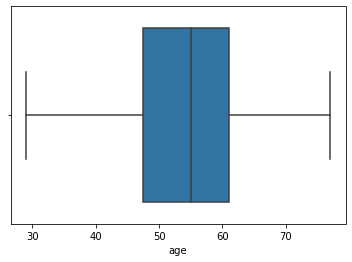

In [278]:
sns.boxplot(df['age'])

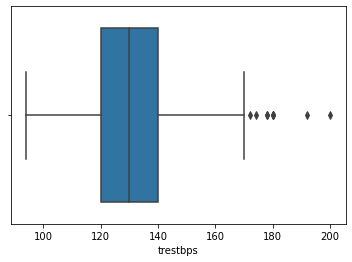

In [279]:
sns.boxplot(df['trestbps'])

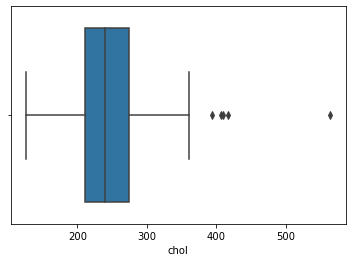

In [280]:
sns.boxplot(df['chol'])

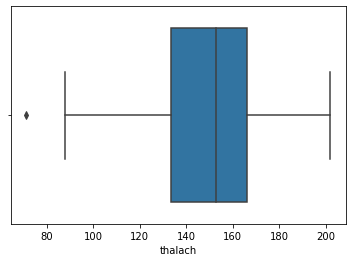

In [281]:
sns.boxplot(df['thalach'])

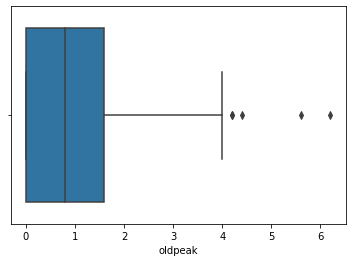

In [282]:
sns.boxplot(df['oldpeak'])

**Removing outliers**

In [283]:
all_outliers=['trestbps','oldpeak','thalach','chol']

In [284]:
from numpy import quantile
for outlier in range(len(all_outliers)):
    med= df[all_outliers[outlier]].median()
    q15= df[all_outliers[outlier]].quantile(0.25)
    q85= df[all_outliers[outlier]].quantile(0.75)
    IQR= (q85-q15)*1.5
    low, upp= q15-IQR, q85+IQR
    df[all_outliers[outlier]]= df[all_outliers[outlier]].apply(lambda x: med if x<low else x)
    df[all_outliers[outlier]]= df[all_outliers[outlier]].apply(lambda x: med if x>upp else x)

In [285]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1


# Exploratory Data Analysis(EDA)

In [286]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1


In [287]:
# 0 --> not having heart disease
# 1 --> having heart disease

In [288]:
import matplotlib.pyplot as plt

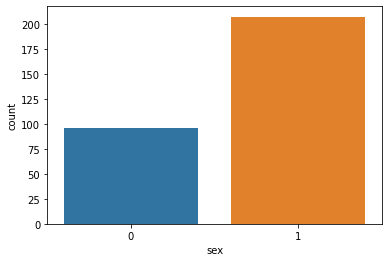

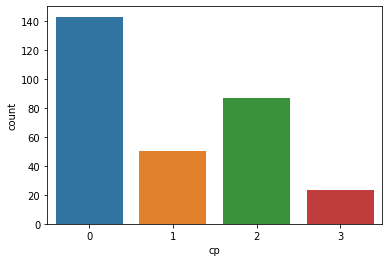

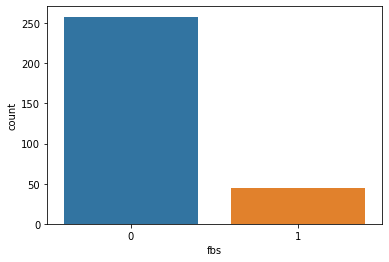

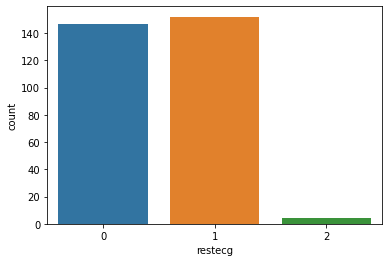

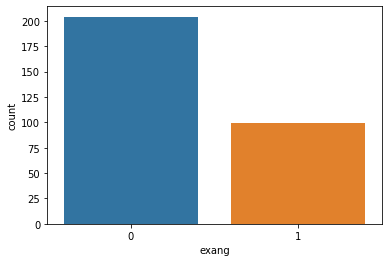

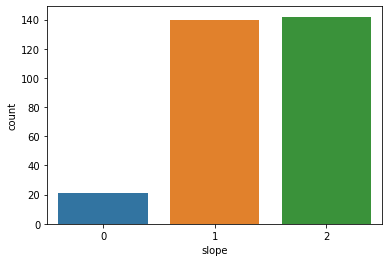

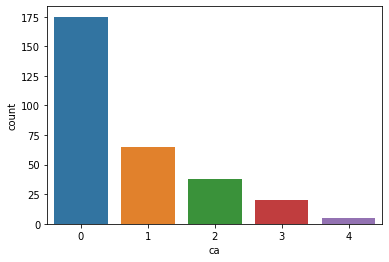

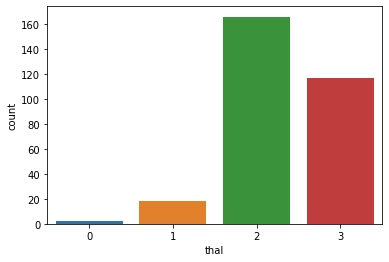

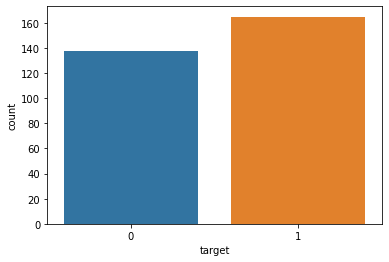

In [289]:
categ=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
for i in range(len(categ)):
    sns.countplot(df[categ[i]])
    plt.show()

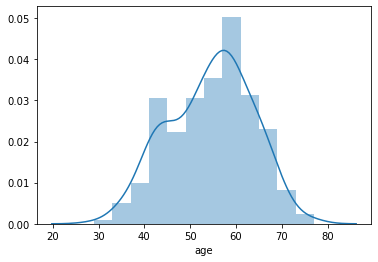

In [290]:
sns.distplot(df['age'])

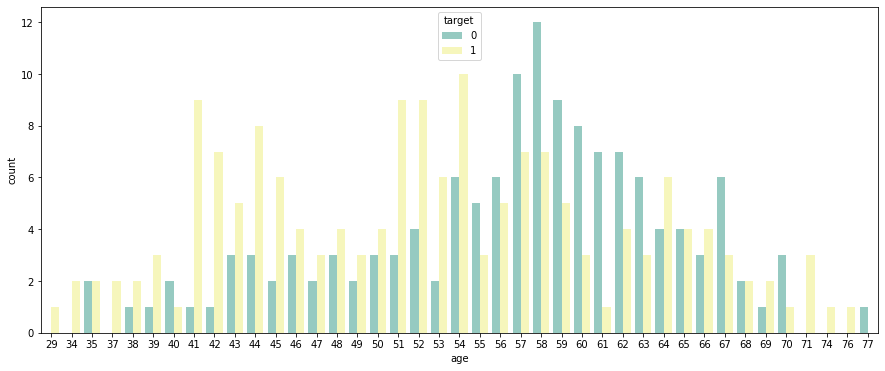

In [291]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['age'],hue=df['target'],data=df,palette="Set3")

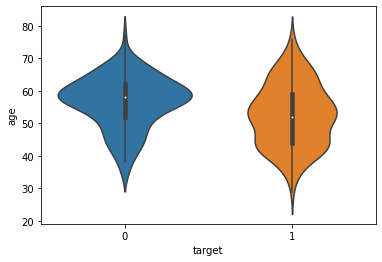

In [292]:
sns.violinplot(x=df['target'],y=df['age'])

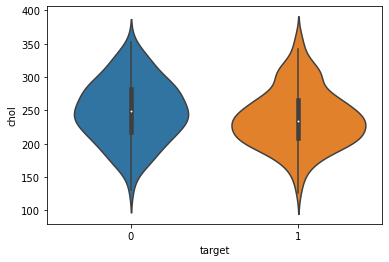

In [293]:
sns.violinplot(x=df['target'],y=df['chol'])

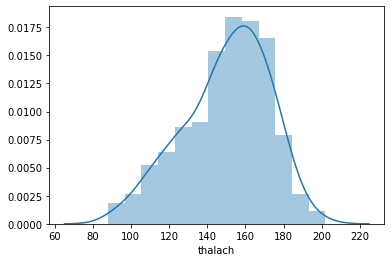

In [294]:
sns.distplot(df['thalach'])

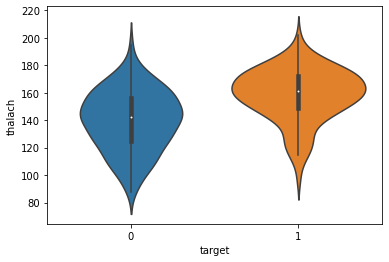

In [295]:
sns.violinplot(x=df['target'],y=df['thalach'])

<Figure size 1440x1080 with 0 Axes>

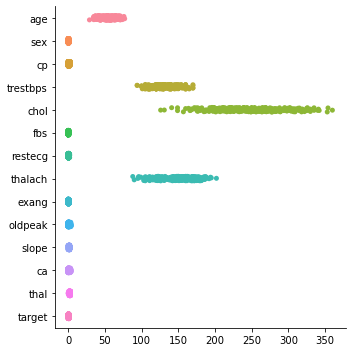

In [296]:
plt.figure(figsize=(20,15))
sns.catplot(data=df,orient='h')

In [297]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1


In [298]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

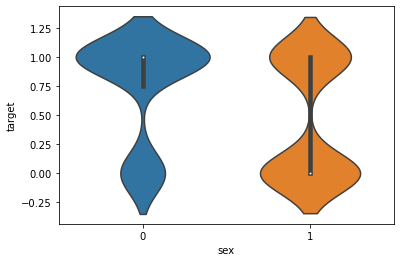

In [299]:
sns.violinplot(x=df['sex'],y=df['target'])

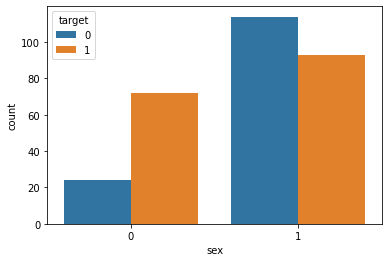

In [300]:
sns.countplot(x='sex',data=df,hue='target')

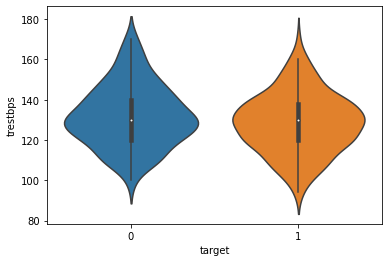

In [301]:
sns.violinplot(x=df['target'],y=df['trestbps'])

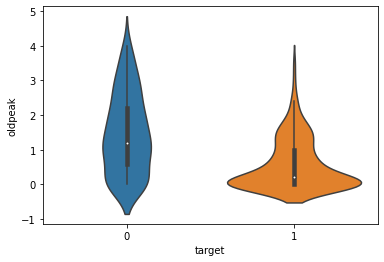

In [302]:
sns.violinplot(x=df['target'],y=df['oldpeak'])

In [303]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

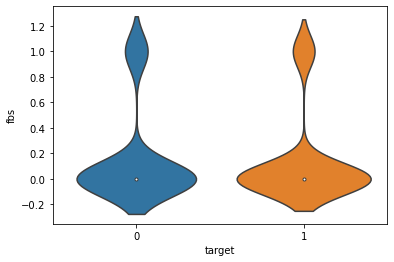

In [304]:
sns.violinplot(x=df['target'],y=df['fbs'])

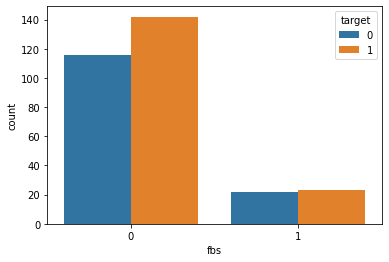

In [305]:
sns.countplot(x=df['fbs'],data=df,hue='target')

# Data Correlation

In [306]:
col=['sex','cp','fbs','restecg','exang','slope','ca','thal']
df_new=pd.get_dummies(df, columns=col)
df_new.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145.0,233.0,150.0,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130.0,250.0,187.0,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130.0,204.0,172.0,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120.0,236.0,178.0,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120.0,354.0,163.0,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [307]:
df_new.corr()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
age,1.000000,0.271469,0.175342,-0.389729,0.212629,-0.225439,0.098447,-0.098447,0.138253,-0.147399,...,-0.192580,-0.350844,0.179284,0.226491,0.162243,-0.122378,-0.016779,0.063758,-0.135891,0.110752
trestbps,0.271469,1.000000,0.090445,-0.072935,0.144102,-0.118564,0.011801,-0.011801,0.006033,-0.086302,...,-0.073610,-0.070849,-0.048972,0.062995,0.119808,0.035224,-0.011291,0.114000,-0.114726,0.063809
chol,0.175342,0.090445,1.000000,-0.035055,0.012755,-0.115910,0.121806,-0.121806,0.078618,0.017789,...,0.010064,-0.079291,0.028169,0.059426,0.083993,-0.101523,-0.060237,-0.090024,0.026154,0.026991
thalach,-0.389729,-0.072935,-0.035055,1.000000,-0.340959,0.417036,0.036685,-0.036685,-0.371376,0.247953,...,0.445731,0.288964,-0.205750,-0.062623,-0.182252,0.060574,-0.052429,-0.166001,0.311708,-0.229332
oldpeak,0.212629,0.144102,0.012755,-0.340959,1.000000,-0.430495,-0.099479,0.099479,0.264982,-0.280422,...,-0.508869,-0.204640,0.021233,0.268255,0.069925,-0.108628,-0.036988,0.084775,-0.306168,0.277978
target,-0.225439,-0.118564,-0.115910,0.417036,-0.430495,1.000000,0.280937,-0.280937,-0.516015,0.245879,...,0.394066,0.465590,-0.232412,-0.273998,-0.210615,0.066441,-0.007293,-0.106589,0.527334,-0.486112
sex_0,0.098447,0.011801,0.121806,0.036685,-0.099479,0.280937,1.000000,-1.000000,-0.089621,0.041249,...,0.014356,0.122854,-0.096673,0.020571,-0.066758,-0.088212,0.032093,-0.141135,0.376365,-0.321559
sex_1,-0.098447,-0.011801,-0.121806,-0.036685,0.099479,-0.280937,-1.000000,1.000000,0.089621,-0.041249,...,-0.014356,-0.122854,0.096673,-0.020571,0.066758,0.088212,-0.032093,0.141135,-0.376365,0.321559
cp_0,0.138253,0.006033,0.078618,-0.371376,0.264982,-0.516015,-0.089621,0.089621,1.000000,-0.420274,...,-0.251935,-0.235437,0.053525,0.220898,0.121443,-0.070563,0.004581,0.098025,-0.349920,0.309357
cp_1,-0.147399,-0.086302,0.017789,0.247953,-0.280422,0.245879,0.041249,-0.041249,-0.420274,1.000000,...,0.223921,0.146198,-0.059046,-0.087804,-0.082372,0.012208,-0.036237,-0.036496,0.207354,-0.188225


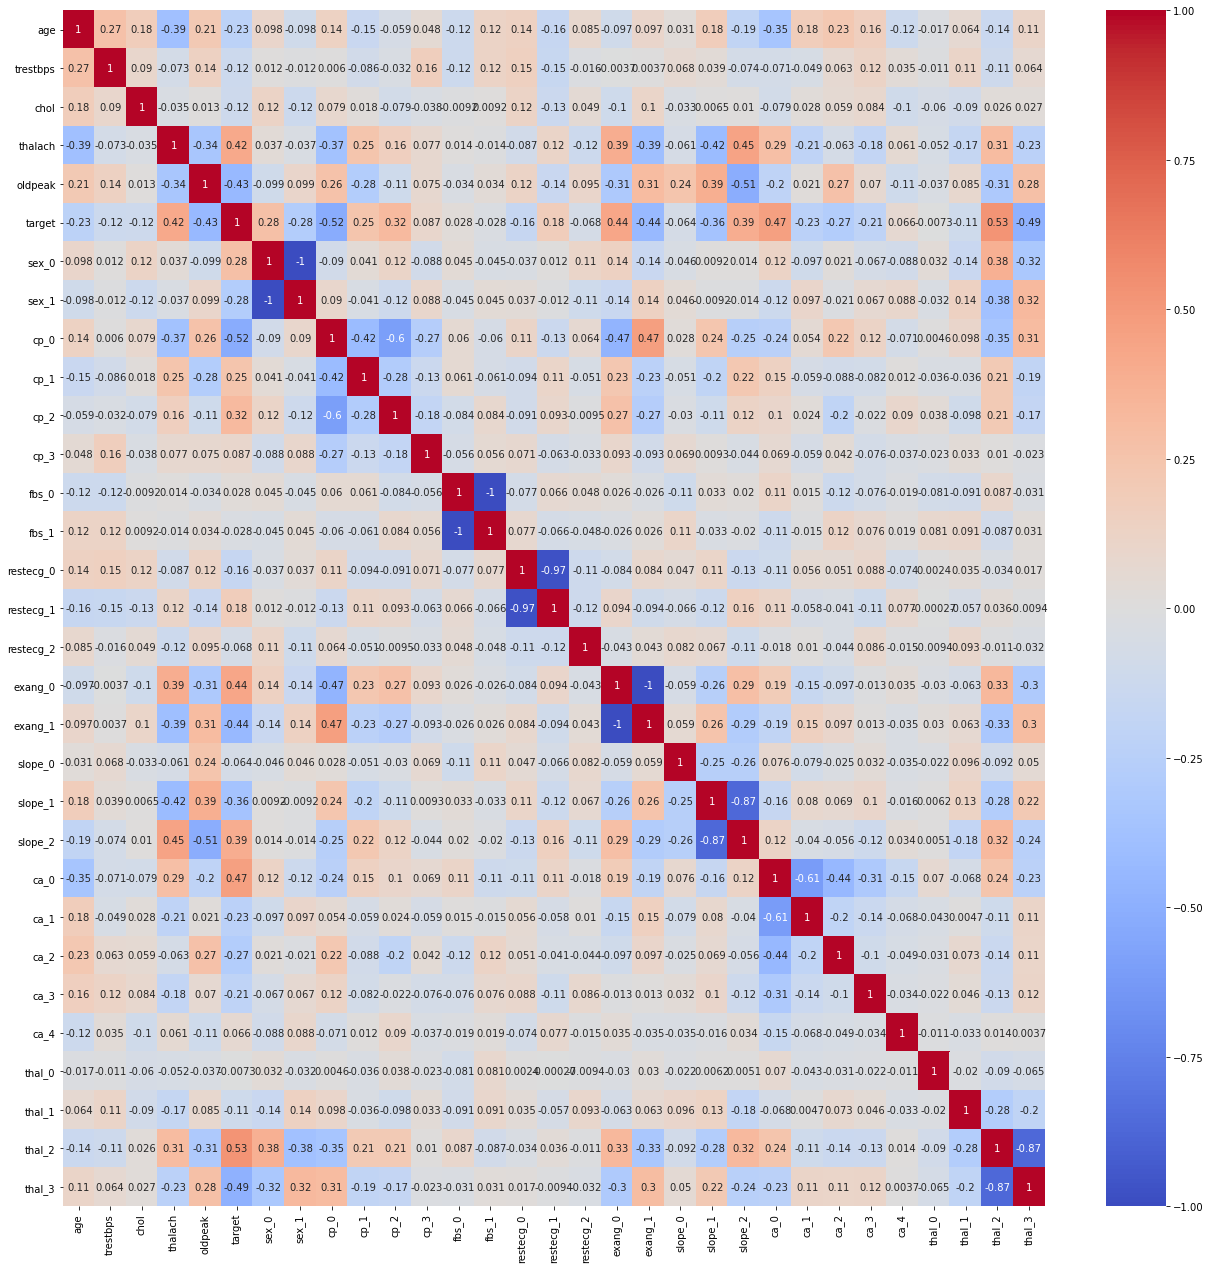

In [308]:
plt.figure(figsize=(22,22))
sns.heatmap(df_new.corr(),cmap='coolwarm',annot=True)

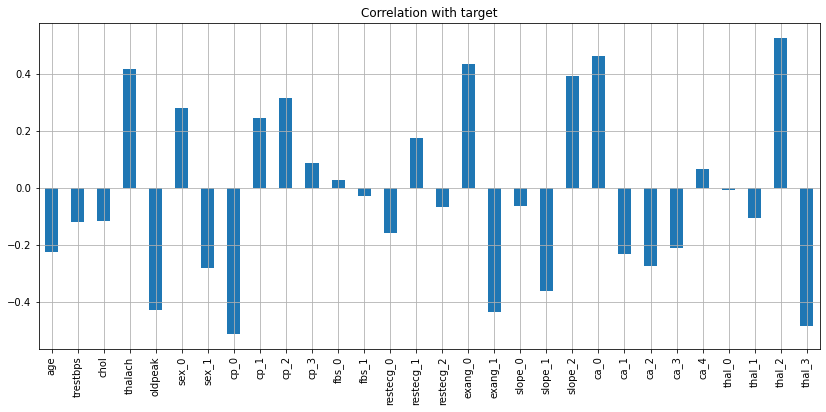

In [309]:
plt.figure(figsize=(14,6))
df_new.drop('target', axis=1).corrwith(df_new.target).plot(kind = 'bar', grid = True,title = "Correlation with target")

In [310]:
df_new.head(1)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145.0,233.0,150.0,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


**Taking threshold correlation of data features with target as greater than 0.4 or less than -0.4 we concludes that features --> ['thalach','oldpeak','cp_0','exang_0','exang_1','ca_0','thal_2','thal_3'] are highly important**

# TRAINING AND TESTING THE DATA USING ML MODELS

In [311]:
X=df_new[['thalach','oldpeak','cp_0','exang_0','exang_1','ca_0','thal_2','thal_3']]
X.head()

,thalach,oldpeak,cp_0,exang_0,exang_1,ca_0,thal_2,thal_3
0,150.0,2.3,0,1,0,1,0,0
1,187.0,3.5,0,1,0,1,1,0
2,172.0,1.4,0,1,0,1,1,0
3,178.0,0.8,0,1,0,1,1,0
4,163.0,0.6,1,0,1,1,1,0


In [312]:
y=df_new['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score

In [314]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=40)

In [315]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [316]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [317]:
x_train

array([[-1.08975204,  0.66321866,  1.08751658, ...,  0.84834956,
         0.94428103, -0.81051484],
       [-0.1515458 ,  1.85099488,  1.08751658, ..., -1.17875938,
        -1.05900676, -0.81051484],
       [-0.8663696 ,  1.05914407,  1.08751658, ..., -1.17875938,
        -1.05900676,  1.2337837 ],
       ...,
       [-1.84925234,  0.56423731,  1.08751658, ..., -1.17875938,
         0.94428103, -0.81051484],
       [ 1.05471938, -0.92048297, -0.91952621, ...,  0.84834956,
        -1.05900676,  1.2337837 ],
       [ 0.02716016, -0.92048297,  1.08751658, ..., -1.17875938,
        -1.05900676,  1.2337837 ]])

In [318]:
x_train.shape, y_train.shape

((227, 8), (227,))

In [319]:
# logistic regression

log=LogisticRegression()
log.fit(x_train,y_train)
pred=log.predict(x_test)
acc=round((accuracy_score(pred,y_test)*100),2)
print('Accuracy of LogisticRegression model is  --->  ',acc)
print('\n')
print('Confusion Matrix   ---->  \n',confusion_matrix(y_test,pred))
print('\n')
print('precision_score of LR model   --->   ',precision_score(y_test,pred))
print('\n')
print('f1score of LR model   --->   ',f1_score(y_test,pred))

Accuracy of LogisticRegression model is  --->   85.53


Confusion Matrix   ---->  
 [[29  5]
 [ 6 36]]


precision_score of LR model   --->    0.8780487804878049


f1score of LR model   --->    0.8674698795180722


In [320]:
# RandomForestClassifier
l=[]
j=[]
for i in range(1,150):
    log=RandomForestClassifier(n_estimators=i)
    log.fit(x_train,y_train)
    pred=log.predict(x_test)
    ac=round((accuracy_score(pred,y_test)*100),2)
    l.append(ac)
    j.append(i)
maxi=l.index(max(l))
ind=j[maxi]
# print(max(l),ind)

log=RandomForestClassifier(n_estimators=ind)
log.fit(x_train,y_train)
pred=log.predict(x_test)
acc=round((accuracy_score(pred,y_test)*100),2)
print('Accuracy of RandomForestClassifier model is  --->  ',acc)
print('\n')
print('Confusion Matrix   ---->  \n',confusion_matrix(y_test,pred))
print('\n')
print('precision_score of RandomForestClassifier model   --->   ',precision_score(y_test,pred))
print('\n')
print('f1score of RandomForestClassifier model   --->   ',f1_score(y_test,pred))

Accuracy of RandomForestClassifier model is  --->   80.26


Confusion Matrix   ---->  
 [[30  4]
 [11 31]]


precision_score of RandomForestClassifier model   --->    0.8857142857142857


f1score of RandomForestClassifier model   --->    0.8051948051948051


In [321]:
# SVC

log=SVC(kernel='sigmoid',C=0.1)
log.fit(x_train,y_train)
pred=log.predict(x_test)
acc=round((accuracy_score(pred,y_test)*100),2)
print('Accuracy of SVC model is  --->  ',acc)
print('\n')
print('Confusion Matrix   ---->  \n',confusion_matrix(y_test,pred))
print('\n')
print('precision_score of SVC model   --->   ',precision_score(y_test,pred))
print('\n')
print('f1score of SVC model   --->   ',f1_score(y_test,pred))

Accuracy of SVC model is  --->   89.47


Confusion Matrix   ---->  
 [[29  5]
 [ 3 39]]


precision_score of SVC model   --->    0.8863636363636364


f1score of SVC model   --->    0.9069767441860465


In [322]:
# DecisionTreeClassifier

log=DecisionTreeClassifier()
log.fit(x_train,y_train)
pred=log.predict(x_test)
acc=round((accuracy_score(pred,y_test)*100),2)
print('Accuracy of DecisionTreeClassifier model is  --->  ',acc)
print('\n')
print('Confusion Matrix   ---->  \n',confusion_matrix(y_test,pred))
print('\n')
print('precision_score of DecisionTreeClassifier model   --->   ',precision_score(y_test,pred))
print('\n')
print('f1score of DecisionTreeClassifier model   --->   ',f1_score(y_test,pred))

Accuracy of DecisionTreeClassifier model is  --->   73.68


Confusion Matrix   ---->  
 [[28  6]
 [14 28]]


precision_score of DecisionTreeClassifier model   --->    0.8235294117647058


f1score of DecisionTreeClassifier model   --->    0.7368421052631577


In [323]:
# KNeighborsClassifier
l=[]
j=[]
for i in range(1,100):
    log=KNeighborsClassifier(n_neighbors=i)
    log.fit(x_train,y_train)
    pred=log.predict(x_test)
    ac=round((accuracy_score(pred,y_test)*100),2)
    l.append(ac)
    j.append(i)
maxi=l.index(max(l))
ind=j[maxi]
log=KNeighborsClassifier(n_neighbors=ind)
log.fit(x_train,y_train)
pred=log.predict(x_test)
acc=round((accuracy_score(pred,y_test)*100),2)
print('Accuracy of KNeighborsClassifier model is  --->  ',acc)
print('\n')
print('Confusion Matrix   ---->  \n',confusion_matrix(y_test,pred))
print('\n')
print('precision_score of KNeighborsClassifier model   --->   ',precision_score(y_test,pred))
print('\n')
print('f1score of KNeighborsClassifier model   --->   ',f1_score(y_test,pred))

Accuracy of KNeighborsClassifier model is  --->   93.42


Confusion Matrix   ---->  
 [[30  4]
 [ 1 41]]


precision_score of KNeighborsClassifier model   --->    0.9111111111111111


f1score of KNeighborsClassifier model   --->    0.9425287356321839


Accuracy of XGBClassifier model is  --->   84.21


Confusion Matrix   ---->  
 [[27  7]
 [ 5 37]]


precision_score of XGBClassifier model   --->    0.8409090909090909


f1score of XGBClassifier model   --->    0.8604651162790699


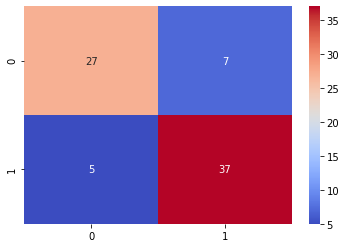

In [329]:
# XGBClassifier

log=XGBClassifier()
log.fit(x_train,y_train)
pred=log.predict(x_test)
acc=round((accuracy_score(pred,y_test)*100),2)
print('Accuracy of XGBClassifier model is  --->  ',acc)
print('\n')
print('Confusion Matrix   ---->  \n',confusion_matrix(y_test,pred))
print('\n')
print('precision_score of XGBClassifier model   --->   ',precision_score(y_test,pred))
print('\n')
print('f1score of XGBClassifier model   --->   ',f1_score(y_test,pred))
# sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)

# WE HAVE ACHIEVED HIGHEST ACCURACY  OF 93.42 % USING KNN MODEL